## 1.Importing Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, precision_score, recall_score
)

## 2.Loading and Preparing Data

In [2]:
df = pd.read_csv("data.csv")
df = df.drop(columns=["id", "Unnamed: 32"], errors='ignore')
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

## 3.Training/Testing Split and Scaling

In [3]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4.Training Logistic Regression

In [4]:
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]


## 5.Evaluation

In [13]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[70  1]
 [ 2 41]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC Score: 0.99737962659679
Accuracy Score: 0.9736842105263158


## 6.ROC Curve

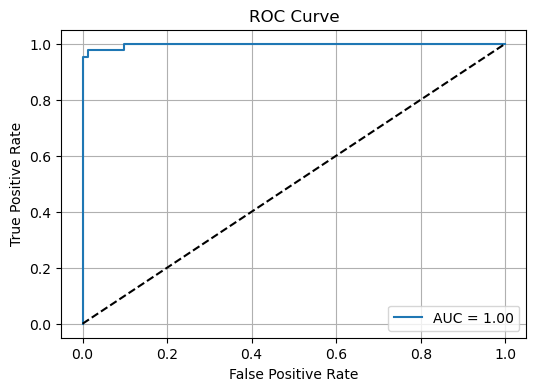

In [6]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


## 7.Threshold Tuning

In [9]:
threshold = 0.3
y_custom = (y_prob >= threshold).astype(int)
print(f"\n Precision at threshold={threshold}:", precision_score(y_test, y_custom))
print("Recall:", recall_score(y_test, y_custom))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_custom))


 Precision at threshold=0.3: 0.9130434782608695
Recall: 0.9767441860465116
Confusion Matrix: 
 [[67  4]
 [ 1 42]]


## 8.Sigmoid Function

In [11]:
print("\nSigmoid Function: \nsigma(z) = 1 / (1 + exp(-z))")
print("It converts the linear output of the logistic regression model into a probability between 0 and 1.")


Sigmoid Function: 
sigma(z) = 1 / (1 + exp(-z))
It converts the linear output of the logistic regression model into a probability between 0 and 1.
